# Importing the Libraries


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Loading the Dataset

In [43]:
dataset = 'cars196'

In [44]:
data = tfds.load(dataset, split ='train', shuffle_files=True)

# Exploring the dataset

In [39]:
import tensorflow_datasets as tfds

dataset, info = tfds.load('cars196', split='train+test',  with_info=True, shuffle_files=True)

# Prefetch the dataset
dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

# Convert the dataset to a NumPy array
numpy_array = list(dataset.take(1).as_numpy_iterator())[0]

# Access the first image and label using standard indexing
image = numpy_array['image']
label = numpy_array['label']

In [40]:
image = next(iter(dataset))['image']

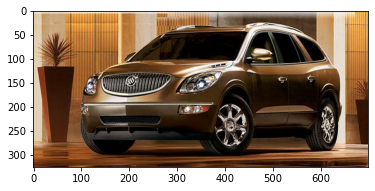

In [41]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.show()

In [49]:

# Print the dataset info
print(info)

# Print the number of images in the dataset
num_images = info.splits['train'].num_examples + info.splits['test'].num_examples
print('Number of images:', num_images)

# Print the number of classes in the dataset
num_classes = info.features['label'].num_classes
print('Number of classes:', num_classes)

# Plot a histogram of the class distribution
class_names = [info.features['label'].int2str(i) for i in range(num_classes)]
class_counts = [0] * num_classes





tfds.core.DatasetInfo(
    name='cars196',
    full_name='cars196/2.1.0',
    description="""
    The Cars dataset contains 16,185 images of 196 classes of cars. The data is split into 8,144 training images and 8,041 testing images, where each class has been split roughly in a 50-50 split. Classes are typically at the level of Make, Model, Year, e.g. 2012 Tesla Model S or 2012 BMW M3 coupe.
    """,
    homepage='https://ai.stanford.edu/~jkrause/cars/car_dataset.html',
    data_path='C:\\Users\\karan\\tensorflow_datasets\\cars196\\2.1.0',
    file_format=tfrecord,
    download_size=1.82 GiB,
    dataset_size=1.85 GiB,
    features=FeaturesDict({
        'bbox': BBoxFeature(shape=(4,), dtype=float32),
        'id': Text(shape=(), dtype=string),
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=196),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo 

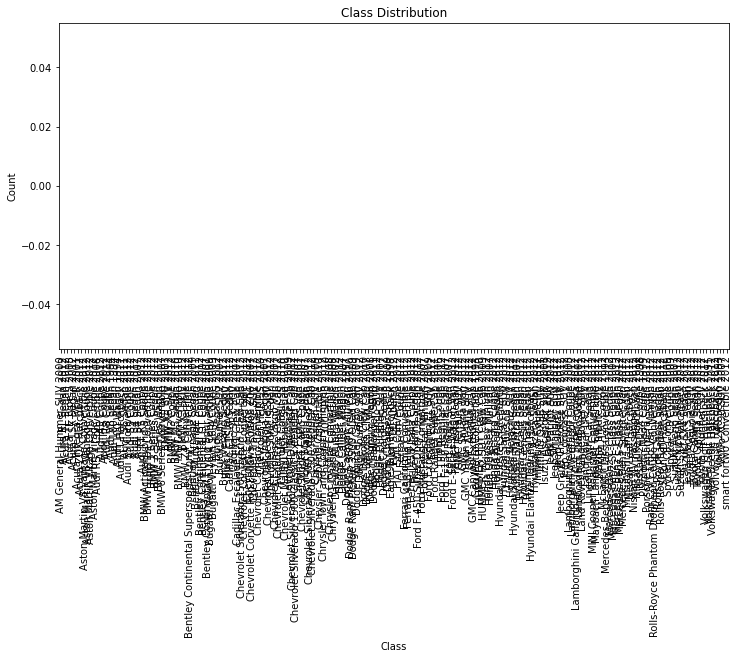

In [56]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(x=class_names, y=class_counts)
plt.xticks(rotation=90)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

AttributeError: 'str' object has no attribute 'take'

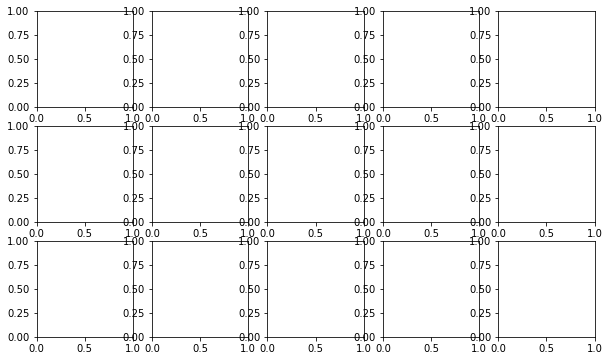

In [58]:
# Plot a sample of images from the dataset
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(10, 6))

for i, example in enumerate(dataset.take(15)):
    image = example['image'].numpy()
    label = example['label'].numpy()
    ax = axes[i//5, i%5]
    ax.imshow(image)
    ax.set_title(class_names[label])
    ax.axis('off')

plt.tight_layout()
plt.show()

# Preprocessing the images

In [68]:
import tensorflow_datasets as tfds
import tensorflow as tf

# Load the cars196 dataset
train_dataset, info = tfds.load('cars196', split='train', with_info=True, shuffle_files=True)
test_dataset = tfds.load('cars196', split='test', shuffle_files=True)

# Define preprocessing functions
IMG_SIZE = 224

def preprocess_train(example):
    image = tf.cast(example['image'], tf.float32)
    label = example['label']
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.keras.applications.resnet_v2.preprocess_input(image)
    return image, label

def preprocess_test(example):
    image = tf.cast(example['image'], tf.float32)
    label = example['label']
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.keras.applications.resnet_v2.preprocess_input(image)
    return image, label

# Apply preprocessing functions to datasets
train_dataset = train_dataset.map(preprocess_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.map(preprocess_test, num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Batch and prefetch datasets
BATCH_SIZE = 32

train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

# Creating the model


In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(196, activation='softmax')
])

# Traning the model

In [71]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_dataset, epochs=10)

Epoch 1/10
255/255 [==============================] - 368s 1s/step - loss: 5.3051 - accuracy: 0.0054
Epoch 2/10
255/255 [==============================] - 375s 1s/step - loss: 5.2777 - accuracy: 0.0083
Epoch 3/10
255/255 [==============================] - 349s 1s/step - loss: 5.2778 - accuracy: 0.0081
Epoch 4/10
255/255 [==============================] - 363s 1s/step - loss: 5.2764 - accuracy: 0.0083
Epoch 5/10
255/255 [==============================] - 381s 1s/step - loss: 5.2780 - accuracy: 0.0081
Epoch 6/10
255/255 [==============================] - 371s 1s/step - loss: 5.2760 - accuracy: 0.0085
Epoch 7/10
255/255 [==============================] - 370s 1s/step - loss: 5.2754 - accuracy: 0.0085
Epoch 8/10
255/255 [==============================] - 363s 1s/step - loss: 5.2694 - accuracy: 0.0088
Epoch 9/10
255/255 [==============================] - 378s 1s/step - loss: 5.2278 - accuracy: 0.0135
Epoch 10/10
255/255 [==============================] - 382s 1s/step - loss: 5.1204 - accura

In [73]:
#Predicting the model 
#model(image)

ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(326, 700, 3)

In [74]:
#Saving the model
model.save('cars_model.h5')

# Creating the Streamlit App

In [76]:
!pip install streamlit

  Using cached streamlit-1.20.0-py2.py3-none-any.whl (9.6 MB)
     -------------------------------------- 164.8/164.8 kB 2.5 MB/s eta 0:00:00
  Using cached blinker-1.5-py2.py3-none-any.whl (12 kB)
     ------------------------------------- 184.3/184.3 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 813.6/813.6 kB 10.3 MB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 14.3 MB/s eta 0:00:00
     ------------------------------------- 238.7/238.7 kB 15.2 MB/s eta 0:00:00
     --------------------------------------- 20.6/20.6 MB 14.2 MB/s eta 0:00:00
     ---------------------------------------- 62.7/62.7 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 17.7 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 84.5/84.5 kB 4.6 MB/s eta 0:00:00
  Using cached tzdata-2022.7-py2.py3-none-any.whl (340 kB)
  Using cached smmap-5.0.0-py3-none-any.whl (24 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=d3e99536fbde1115e91ef4e883069ee362b7a6204e825a9d6b8af1d26e48c6ad
  Stored in directory: c:\users\karan\appdata\local\pip\cache\wheels\5c\6a\fd\17a2b6f8d376e336d46414eeaf656327fd973158159b059046
Successfully built validators
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.11.2
    Uninstalling Pygments-2.11.2:
      Successfully uninstalled Pygments-2.11.2


In [ ]:
%%writefile app.py
import streamlit as st
from PIL import Image

@st.cache(allow_output_mutation=True)
def load_model():
    model = tf.keras.models.load_model('cars_model.h5')
    return model

model = load_model()

def predict(image):
    image = tf.image.resize(image, [224, 224])
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = image / 255.0
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)
    prediction = np.argmax(prediction)
    return prediction

st.title("Cars196 Image Classifier")

uploaded_file = st.file_uploader("Choose an image...", type="jpg")
if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image.', use_column_width=True)
    prediction = predict(image)
    st.write("Prediction:", info.features['label'].int2str(prediction))

In [ ]:
!streamlit run app.py